# Long short-term memory (LSTM)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.optimizers import Adam

In [3]:
n_train = 8000
n_test = 2000
x_train = np.random.randint(10, size=(n_train,30))
x_test = np.random.randint(10, size=(n_test,30))

In [4]:
def label(x):
    y = np.sum(x,axis=1)
    label = 1*(y>=100)
    return label

In [5]:
y_train = label(x_train)
y_test = label(x_test)

In [6]:
y_test
x_train = x_train.reshape((8000,30,1))
x_test = x_test.reshape((2000,30,1))

In [7]:
inputs = keras.Input(shape=(30,1))
lstm = LSTM(200,return_sequences = True)(inputs)
output = Dense(1, activation = "sigmoid" )(lstm)
model = keras.Model(inputs = inputs, outputs = output, name = "LSTM")
model.summary()

Model: "LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 30, 200)           161600    
_________________________________________________________________
dense (Dense)                (None, 30, 1)             201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer = Adam(learning_rate=0.001,beta_1=0.9,
                beta_2=0.999, epsilon=1e-8),
    metrics=["binary_accuracy"])

In [9]:
history = model.fit(x_train, y_train, batch_size=50, epochs=60,
                    shuffle=True, validation_data=(x_test, y_test))

Epoch 1/60
160/160 [==============================] - 24s 151ms/step - loss: 0.0790 - binary_accuracy: 0.9901 - val_loss: 0.0546 - val_binary_accuracy: 0.9910
Epoch 2/60
160/160 [==============================] - 24s 150ms/step - loss: 0.0531 - binary_accuracy: 0.9901 - val_loss: 0.0519 - val_binary_accuracy: 0.9909
Epoch 3/60
160/160 [==============================] - 23s 146ms/step - loss: 0.0482 - binary_accuracy: 0.9901 - val_loss: 0.0519 - val_binary_accuracy: 0.9910
Epoch 4/60
160/160 [==============================] - 22s 135ms/step - loss: 0.0443 - binary_accuracy: 0.9901 - val_loss: 0.0430 - val_binary_accuracy: 0.9910
Epoch 5/60
160/160 [==============================] - 24s 147ms/step - loss: 0.0417 - binary_accuracy: 0.9902 - val_loss: 0.0409 - val_binary_accuracy: 0.9910
Epoch 6/60
160/160 [==============================] - 25s 153ms/step - loss: 0.0423 - binary_accuracy: 0.9906 - val_loss: 0.0552 - val_binary_accuracy: 0.9911
Epoch 7/60
160/160 [==========================

160/160 [==============================] - 22s 135ms/step - loss: 0.0330 - binary_accuracy: 0.9917 - val_loss: 0.0381 - val_binary_accuracy: 0.9909
Epoch 53/60
160/160 [==============================] - 21s 131ms/step - loss: 0.0326 - binary_accuracy: 0.9917 - val_loss: 0.0431 - val_binary_accuracy: 0.9909
Epoch 54/60
160/160 [==============================] - 23s 142ms/step - loss: 0.0319 - binary_accuracy: 0.9918 - val_loss: 0.0386 - val_binary_accuracy: 0.9906
Epoch 55/60
160/160 [==============================] - 25s 155ms/step - loss: 0.0318 - binary_accuracy: 0.9919 - val_loss: 0.0417 - val_binary_accuracy: 0.9896
Epoch 56/60
160/160 [==============================] - 24s 150ms/step - loss: 0.0307 - binary_accuracy: 0.9924 - val_loss: 0.0416 - val_binary_accuracy: 0.9899
Epoch 57/60
160/160 [==============================] - 26s 162ms/step - loss: 0.0303 - binary_accuracy: 0.9924 - val_loss: 0.0409 - val_binary_accuracy: 0.9895
Epoch 58/60
160/160 [==============================]

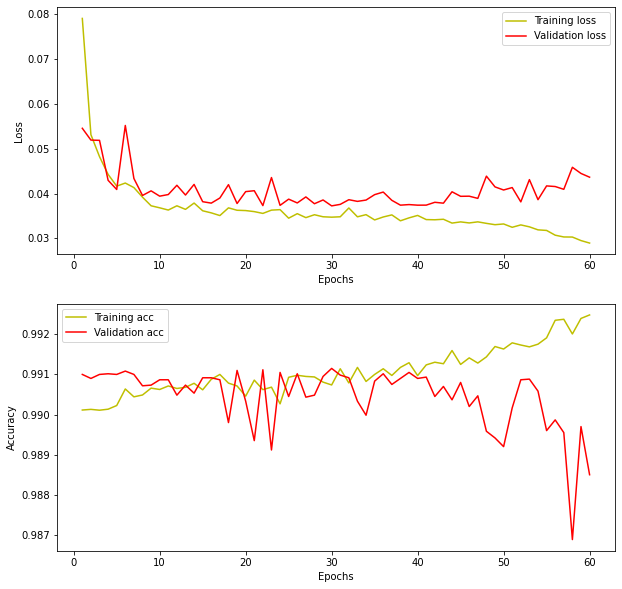

In [14]:
plt.figure(figsize=(10, 10))
plt.subplot(211)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
#plt.title(title_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(212)
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
#plt.title(title_acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplots_adjust(wspace = 0.5)
plt.show()

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.043648239225149155
Test accuracy: 0.9884999394416809


In [11]:
print("Number of examples in the test set with classification equal to 1: ",
      len(y_test[y_test==1]),
      "\nNumber of examples in the test set with classification equal to 0:",
      len(y_test[y_test==0]))

print("\nNumber of examples in the train set with classification equal to 1: ",
      len(y_train[y_train==1]),
      "\nNumber of examples in the train set with classification equal to 0:",
      len(y_train[y_train==0]))

Number of examples in the test set with classification equal to 1:  1982 
Number of examples in the test set with classification equal to 0: 18

Number of examples in the train set with classification equal to 1:  7921 
Number of examples in the train set with classification equal to 0: 79
